<a href="https://colab.research.google.com/github/Electromensch/Grease-detect/blob/main/EDA_grease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import json
sns.set()

# Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('drive/MyDrive/vibration_data_and_header.csv')

In [ ]:
data.head()

,identifier,low_grease,s1_fb1,s1_fb2,s1_fb3,s1_fb4,s1_fb5,s2_fb1,s2_fb2,s2_fb3,s2_fb4,s2_fb5
0,1,0,193.354127,199.216030,163.355636,192.992784,191.464309,194.993160,197.404228,179.661069,195.639494,187.282497
1,2,0,189.812360,197.276925,160.930905,197.587089,192.195973,194.666661,201.669789,187.436239,196.766512,191.081678
2,3,0,195.701129,197.603492,160.558204,195.922677,194.815197,194.713178,196.443662,188.786681,197.238927,194.375613
3,4,0,185.222741,195.595038,174.492461,194.051625,198.489453,200.517259,196.386578,200.080633,197.848037,206.754103
4,5,0,194.886473,196.721925,180.923926,193.229550,194.106990,196.399191,190.816571,190.248573,201.052747,206.314634


In [7]:
data.drop(columns=['identifier'],inplace=True)

# Analysis

In [8]:
data['low_grease'].value_counts()

0    20040
1    10340
Name: low_grease, dtype: int64

In [17]:
def plot_distribution_stats(data,column):
    plt.figure(figsize=(12,6))
    sns.distplot(data[column])
    plt.title(f'Distribution of values for column : {column}')
    display(f'Mean of distribution : {data[column].mean()}')
    display(f'Std of distribution : {data[column].std()}')
    display(f'Median of distribution : {np.median(data[column])}')

<ipython-input-17-9aa960202674>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


'Mean of distribution : 174.6679588050276'

'Std of distribution : 33.73479025373999'

'Median of distribution : 191.494422060102'

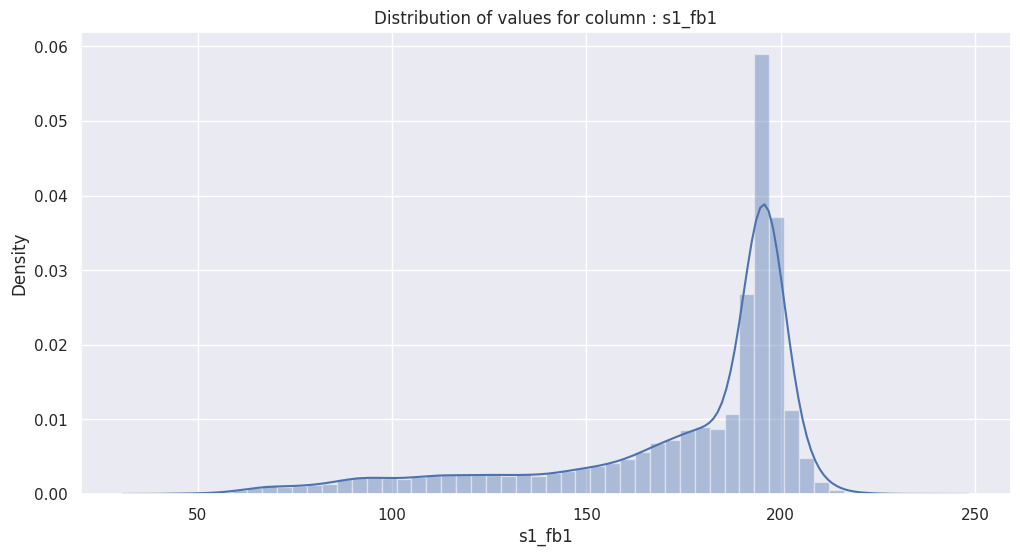

In [18]:
plot_distribution_stats(data, 's1_fb1')

<ipython-input-17-9aa960202674>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


'Mean of distribution : 172.354684272195'

'Std of distribution : 35.285846306941636'

'Median of distribution : 190.317703975537'

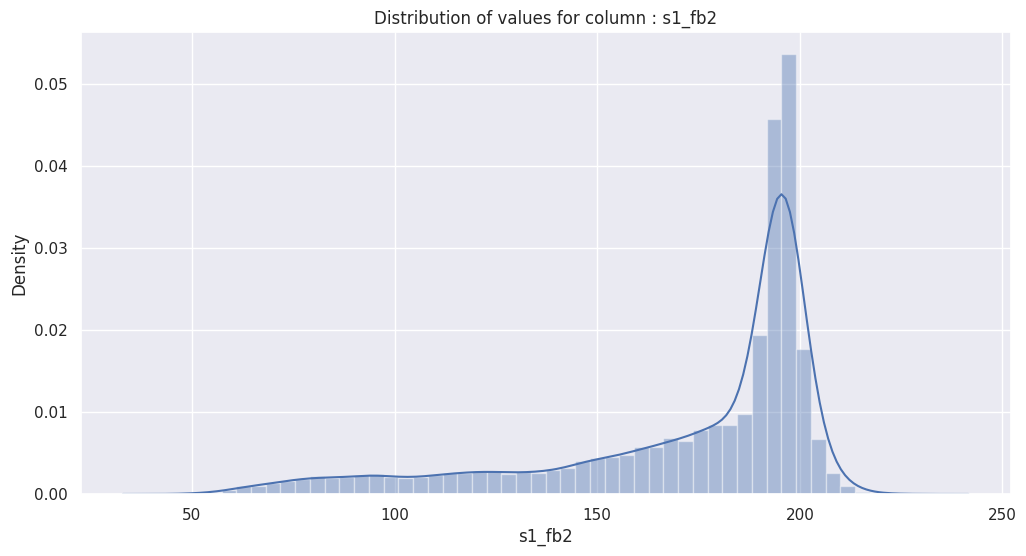

In [19]:
plot_distribution_stats(data, 's1_fb2')

<ipython-input-17-9aa960202674>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


'Mean of distribution : 174.1013686074525'

'Std of distribution : 35.54605677099458'

'Median of distribution : 191.632040326779'

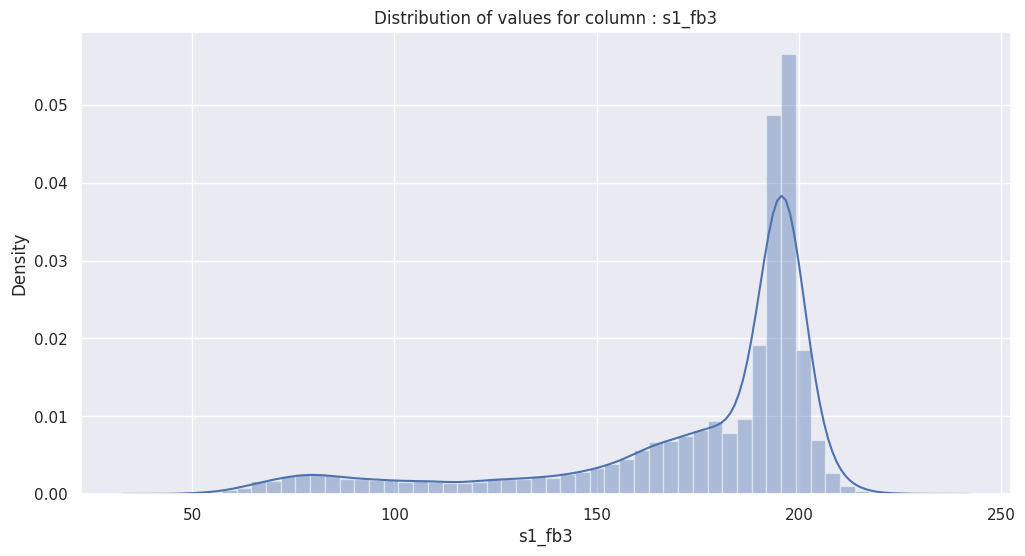

In [20]:
plot_distribution_stats(data, 's1_fb3')

<ipython-input-17-9aa960202674>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


'Mean of distribution : 174.0533572105834'

'Std of distribution : 32.29726291021019'

'Median of distribution : 190.414673525115'

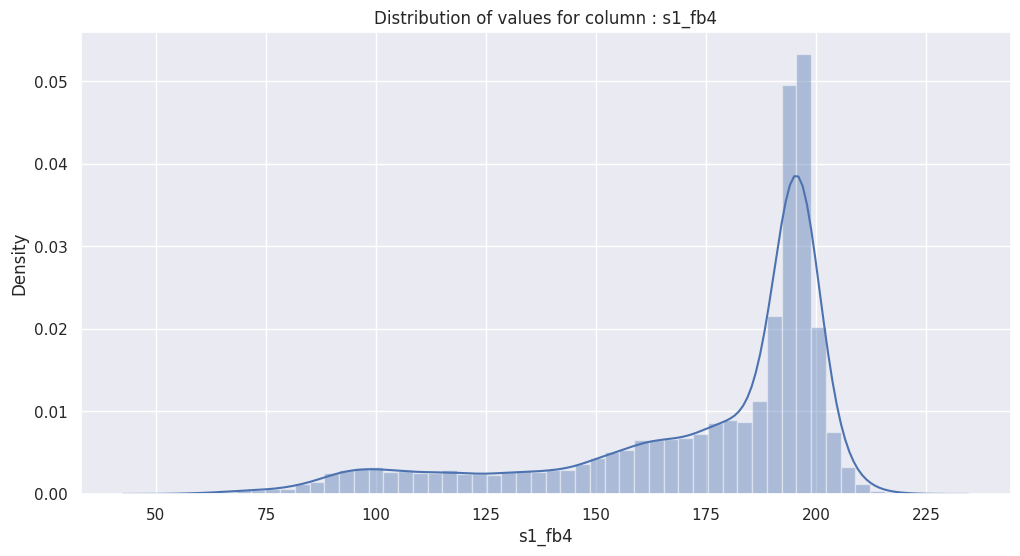

In [21]:
plot_distribution_stats(data, 's1_fb4')

<ipython-input-17-9aa960202674>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


'Mean of distribution : 173.29686942213723'

'Std of distribution : 34.21673706811747'

'Median of distribution : 190.661771530608'

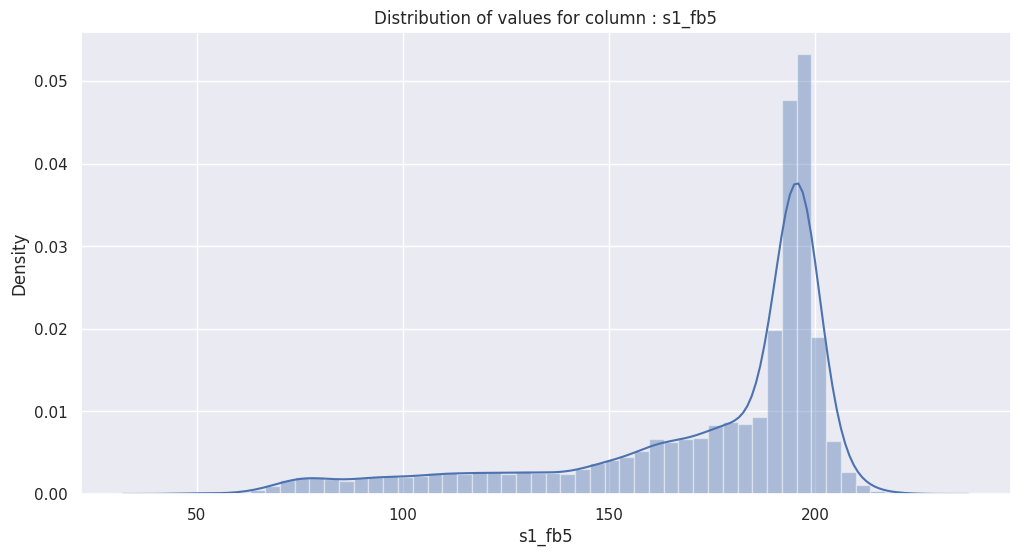

In [22]:
plot_distribution_stats(data, 's1_fb5')

<ipython-input-17-9aa960202674>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


'Mean of distribution : 170.31562985943887'

'Std of distribution : 34.48760510104202'

'Median of distribution : 186.765952431914'

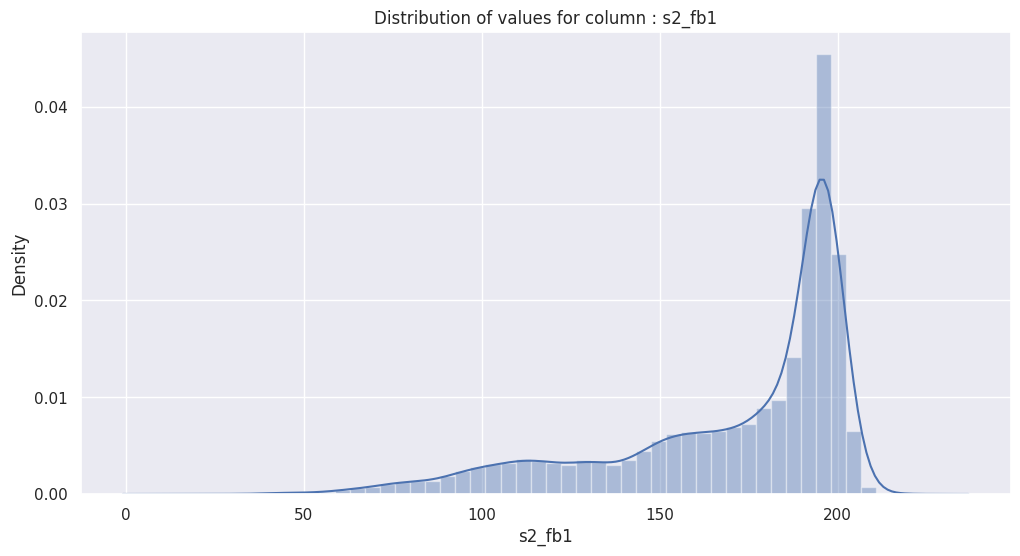

In [23]:
plot_distribution_stats(data, 's2_fb1')

<ipython-input-17-9aa960202674>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


'Mean of distribution : 168.1090903438857'

'Std of distribution : 35.10942644786578'

'Median of distribution : 183.955514927993'

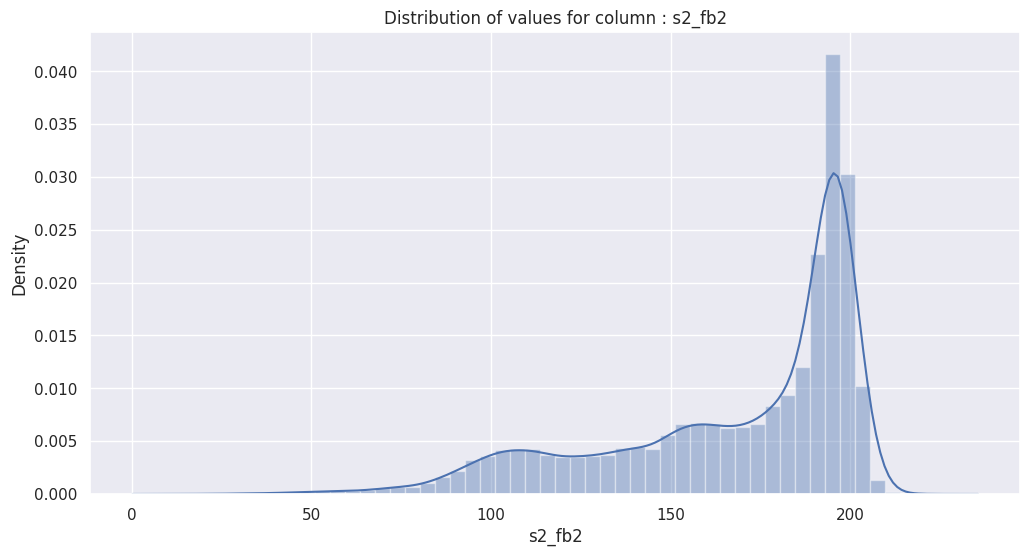

In [24]:
plot_distribution_stats(data, 's2_fb2')

<ipython-input-17-9aa960202674>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


'Mean of distribution : 166.49649826600375'

'Std of distribution : 35.55311528366747'

'Median of distribution : 181.2960805556815'

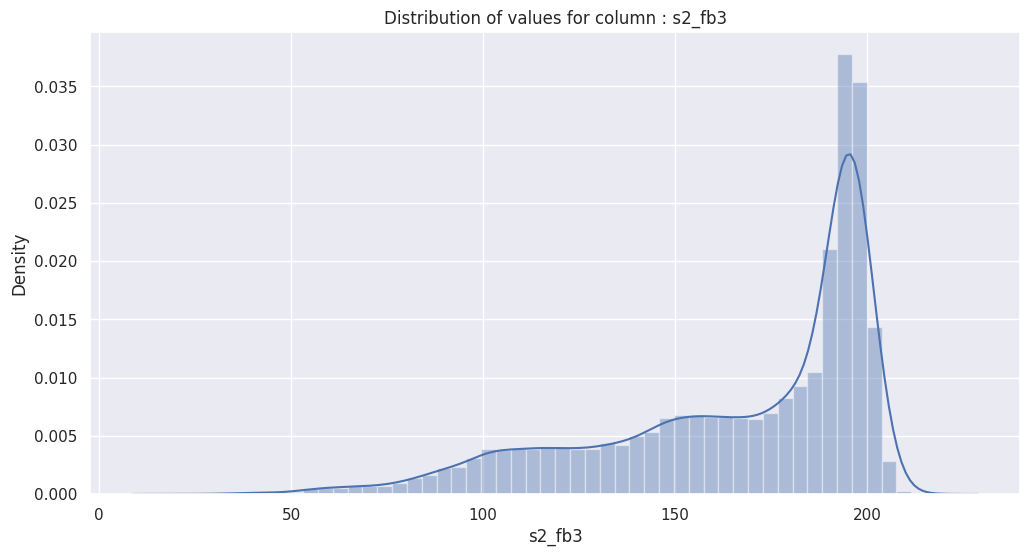

In [25]:
plot_distribution_stats(data, 's2_fb3')

<ipython-input-17-9aa960202674>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


'Mean of distribution : 169.07392421237498'

'Std of distribution : 34.165558115522586'

'Median of distribution : 184.63753836658248'

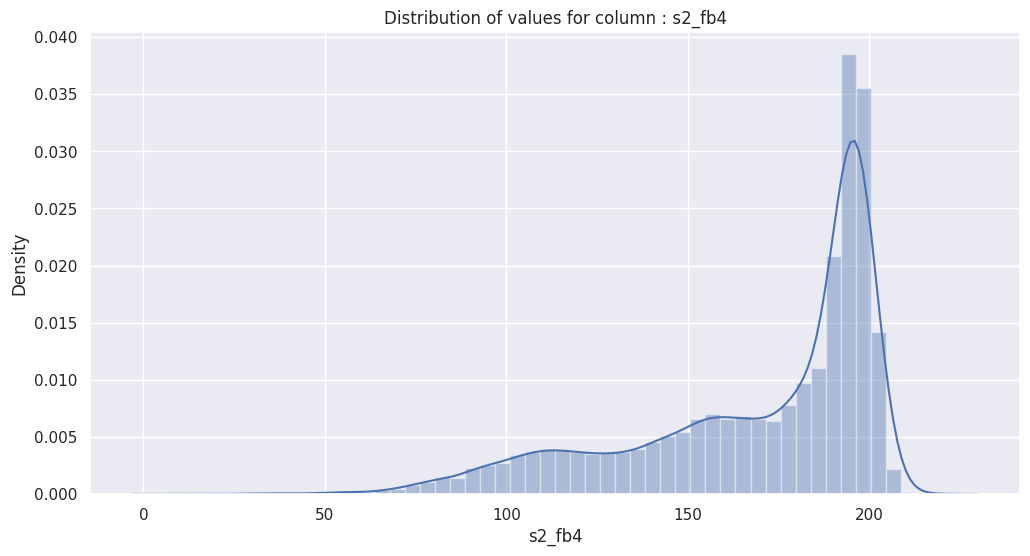

In [26]:
plot_distribution_stats(data, 's2_fb4')

<ipython-input-17-9aa960202674>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


'Mean of distribution : 168.86662108332223'

'Std of distribution : 34.54696152816158'

'Median of distribution : 185.12299917080952'

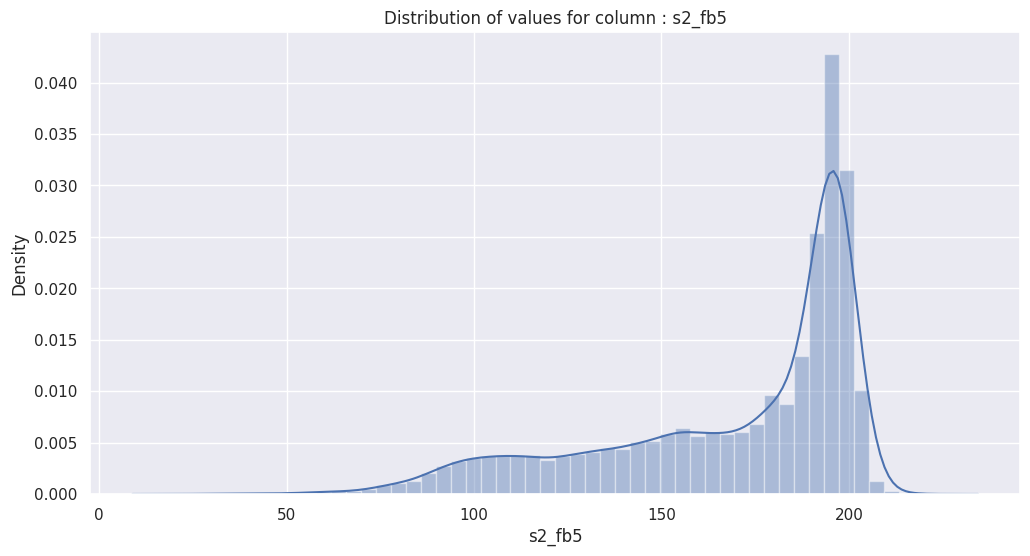

In [27]:
plot_distribution_stats(data, 's2_fb5')

In [28]:
def highlight_big_corr(val):
    val = np.abs(val)
    if val>=0.2 and val<0.4:
        color = 'blue'
    elif val>=0.4:
        color='red'
    else:
        color = 'black'
    return 'color: %s' % color


In [29]:
corr = data.corr()
corr.style.applymap(highlight_big_corr)

,low_grease,s1_fb1,s1_fb2,s1_fb3,s1_fb4,s1_fb5,s2_fb1,s2_fb2,s2_fb3,s2_fb4,s2_fb5
low_grease,1.000000,0.227255,-0.205629,-0.068067,-0.227880,-0.197301,0.236437,-0.209201,-0.197760,-0.240658,-0.210972
s1_fb1,0.227255,1.000000,-0.095896,-0.135694,0.575644,-0.203017,0.916722,-0.149892,-0.271194,0.534567,-0.275239
s1_fb2,-0.205629,-0.095896,1.000000,-0.043519,0.055642,0.035878,0.000329,0.910997,0.013109,0.161695,-0.029341
s1_fb3,-0.068067,-0.135694,-0.043519,1.000000,-0.178150,0.614246,-0.100592,0.071346,0.560362,-0.153464,0.554315
s1_fb4,-0.227880,0.575644,0.055642,-0.178150,1.000000,-0.051482,0.543603,-0.003723,-0.190884,0.915100,-0.124573
s1_fb5,-0.197301,-0.203017,0.035878,0.614246,-0.051482,1.000000,-0.172919,0.154276,0.677660,-0.023558,0.910521
s2_fb1,0.236437,0.916722,0.000329,-0.100592,0.543603,-0.172919,1.000000,-0.053908,-0.276654,0.549628,-0.272505
s2_fb2,-0.209201,-0.149892,0.910997,0.071346,-0.003723,0.154276,-0.053908,1.000000,0.141032,0.098487,0.091226
s2_fb3,-0.197760,-0.271194,0.013109,0.560362,-0.190884,0.677660,-0.276654,0.141032,1.000000,-0.194771,0.720296
s2_fb4,-0.240658,0.534567,0.161695,-0.153464,0.915100,-0.023558,0.549628,0.098487,-0.194771,1.000000,-0.126283


In [30]:
highly_correlated = list(corr['low_grease'][np.abs(corr['low_grease'])>0.2].index)

In [31]:
highly_correlated

['low_grease',
 's1_fb1',
 's1_fb2',
 's1_fb4',
 's2_fb1',
 's2_fb2',
 's2_fb4',
 's2_fb5']

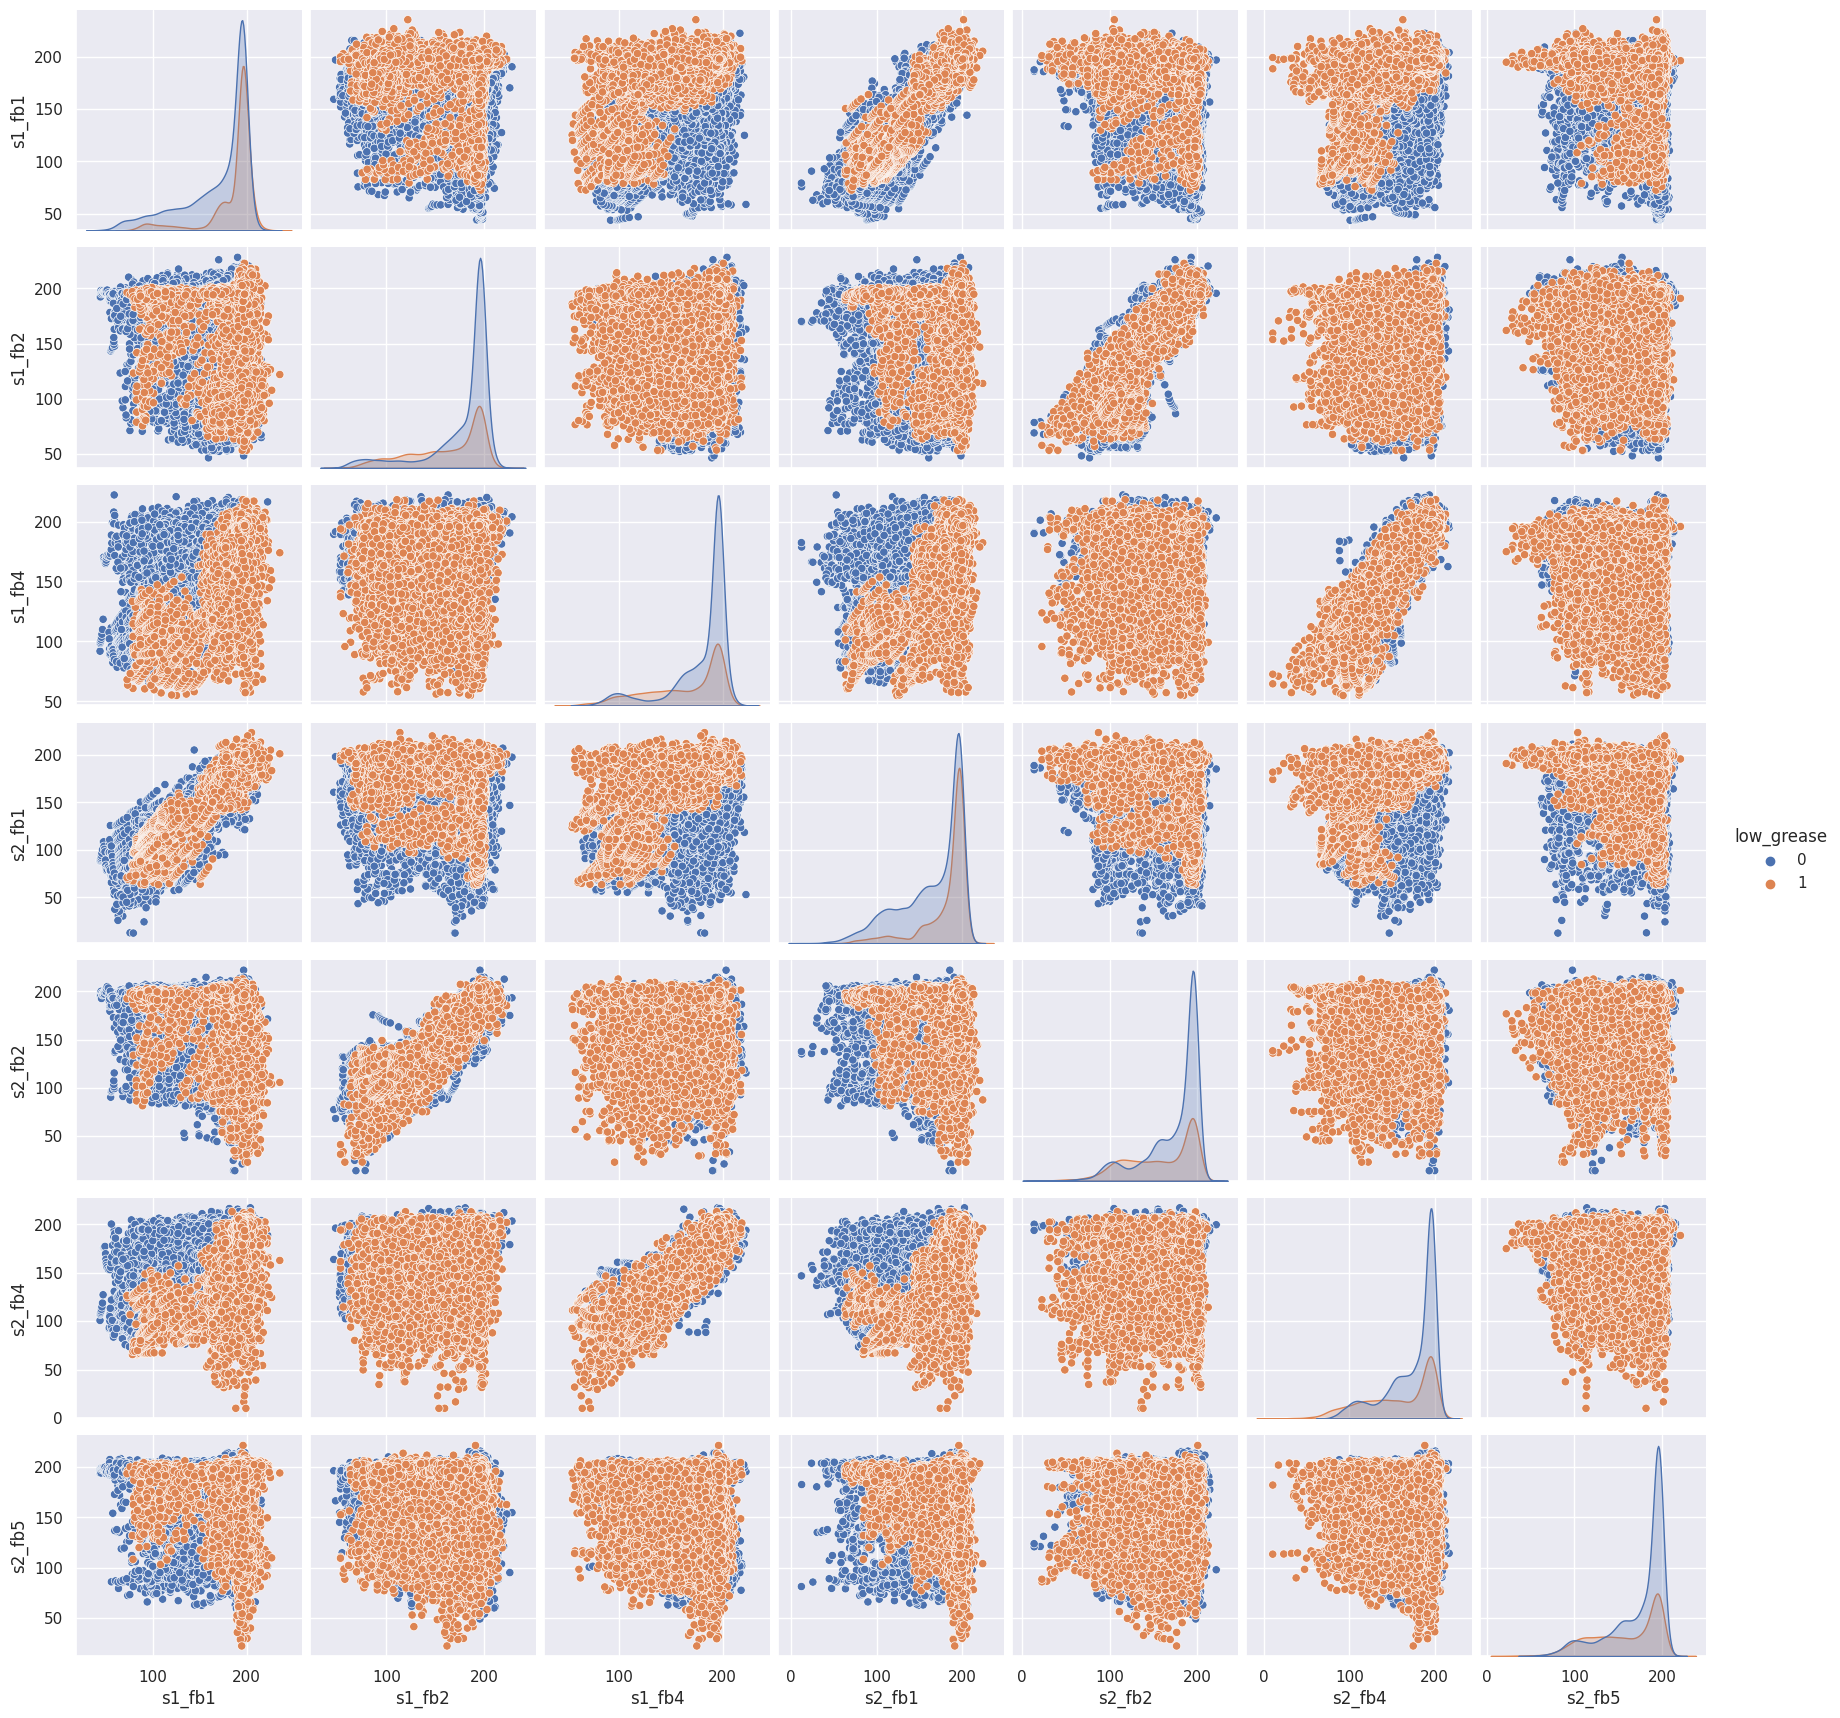

In [32]:
sns.pairplot(data,vars=highly_correlated[1:],hue='low_grease');